In [2]:
import pandas as pd

df = pd.read_csv("crop_yield.csv")
df.head()


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [3]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [4]:
df.isnull().sum()


Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [5]:
import pandas as pd
df_encoded = pd.get_dummies(df,
    columns=['Crop', 'Season', 'State'],
    drop_first=True)
df_encoded.head()


,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1997,6637.0,4685,2051.4,631643.29,2057.47,0.710435,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1997,796.0,22,2051.4,75755.32,246.76,0.238333,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1997,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1997,1739.0,794,2051.4,165500.63,539.09,0.420909,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
y = df_encoded['Yield']
X = df_encoded.drop('Yield', axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 99.60899705888995
R² Score: 0.9876167515751166


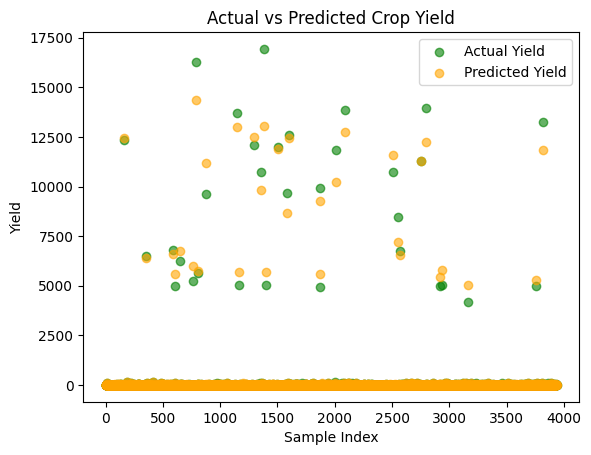

In [16]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_test)), y_test, color='green', alpha=0.6, label='Actual Yield')
plt.scatter(range(len(y_pred)), y_pred, color='orange', alpha=0.6, label='Predicted Yield')
plt.xlabel("Sample Index")
plt.ylabel("Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.legend()
plt.show()